# Deep learning projects ( CIFAR10)


## About the data:
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Classes Name) :
1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck

# Pipeline to build the model

1. Import all necessary library
2. Read the datasets
3. Explore the data
4. Preprocess the data
5. Build the model
6. Train the model
7. Evaluate the model 
8. Predict the test data
9. Save the model
10. Load the model for the further test ( to do that we does not need to train the data we only test data)
11. test the data


# 1. Import all necessary library

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
import string
from keras import datasets
from keras.layers import Dense, Dropout, Flatten,MaxPool2D,Conv2D,BatchNormalization , Input,Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import pickle

In [2]:
batch_size=32
epochs =30

# 2. Read the datasets

In [3]:
# traing and testing dataset

(x_train , y_train),(x_test,y_test)= datasets.cifar10.load_data()
x_train.shape , x_test.shape , y_train.shape , y_test.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

# 3. Explore the data

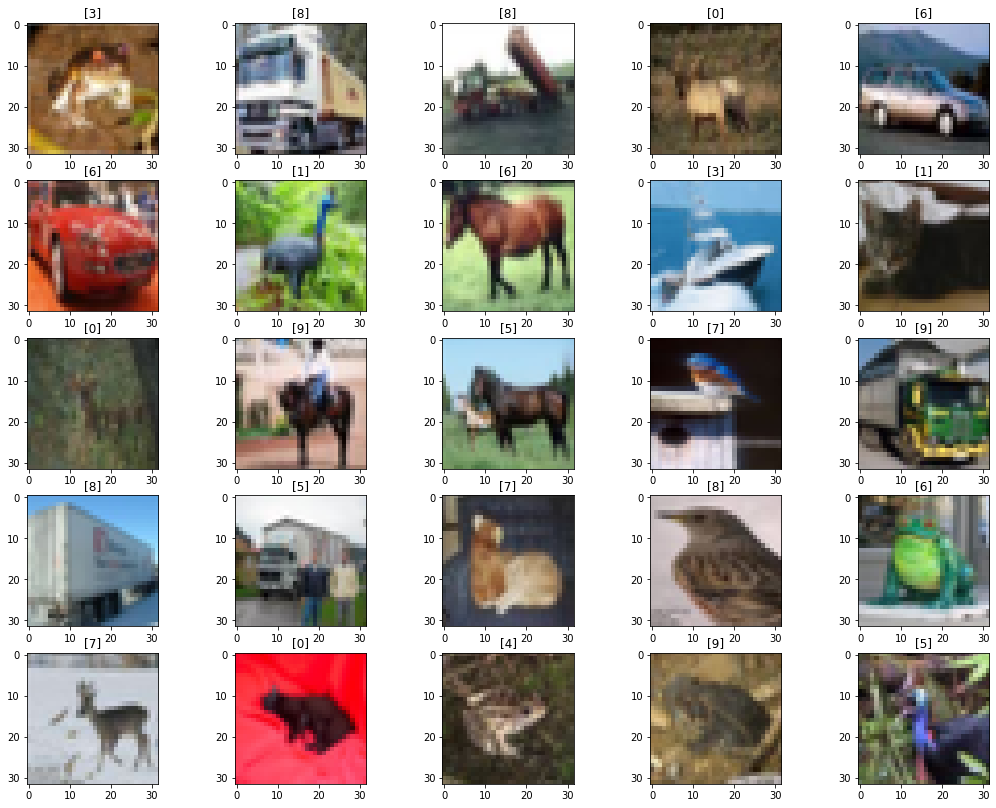

In [4]:
plt.figure(figsize=(18,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(y_test[i])
  plt.imshow(x_train[i])
# plt.imshow(x_train[0])

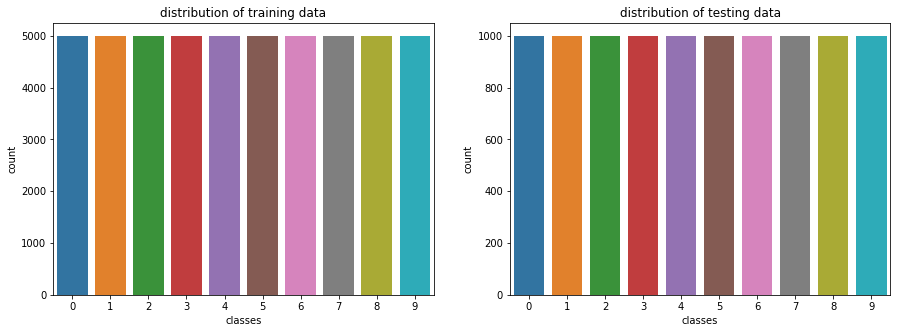

In [5]:
import seaborn as sns
fix,axes= plt.subplots(1,2, figsize=(15,5))
# count plot for training set
sns.countplot(y_train.ravel(),ax=axes[0])
axes[0].set_title("distribution of training data")
axes[0].set_xlabel("classes")

# count plot for testing data
sns.countplot(y_test.ravel(),ax=axes[1])
axes[1].set_title("distribution of testing data")
axes[1].set_xlabel("classes")
plt.show()

# 4. Preprocess the dataset 
1. Normalize the data
2. using one hot encoding to transform the categorcal data into 0 and 1 form (means if one class value is 1 then other value for the records will be 0.)

ex : 

airplane      : 1 0 0 0 0 0 

automobile : 0 1 0 0 0 0

bird       : 0 0 1 0 0 0 

cat        : 0 0 0 1 0 0

deer       : 0 0 0 0 1 0

dog        : 0 0 0 0 0 1


Here pixel value are between 0-255 . So we will normalize the pixel value between 0-1 . for this we will divide the each and every value by 255.

In [6]:
x_train  = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [7]:
unique,counts=np.unique(y_train, return_counts=True)
print(unique)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# ![](https://drive.google.com/file/d/1fE-7qL2uZ16K_ah8GHl73sZSlqXsciFQ/view?usp=sharing)

In [8]:
# apply the one hot encoding that mean we will convert the all value into 0 and 1 form 
# if one class is 1, all classes for that records will be 0 and so no.
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [9]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Create the model

### Convolutional neural network
Convolutional neural network (CNN, or ConvNet) is a class of artificial neural network, most commonly applied to analyze visual imagery.A convolutional neural network is used to detect and classify objects in an image.

1. Convolution layer: 
This is the first step in the process of extracting valuable features from an image. A convolution layer has several filters that perform the convolution operation. Every image is considered as a matrix of pixel values.

2. Activation function(relu):
ReLU performs an element-wise operation and sets all the negative pixels to 0. It introduces non-linearity to the network, and the generated output is a rectified feature map.
R(z) = max(0,z)

3. Pooling layer:
Pooling is a down-sampling operation that reduces the dimensionality of the feature map. The rectified feature map now goes through a pooling layer to generate a pooled feature map.
The pooling layer uses various filters to identify different parts of the image like edges, corners, body, feathers, eyes, and beak.

4. Flatten layers:
The next step in the process is called flattening. Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.

5. Dense Layer(output layer):
The flattened matrix is fed as input to the fully connected layer to classify the image.

* If we are facing overfitting problem, we will use the dropout or batch normalization layers after the convolution layer.

* We can use more than one convolution layers in our model.






In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax'))  # softmax is used for classification


In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary the models
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
history  = model.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3911 - accuracy: 0.5009 - val_loss: 1.1437 - val_accuracy: 0.5967
Epoch 2/20
1563/1563 [==============================] - 118s 75ms/step - loss: 1.0274 - accuracy: 0.6399 - val_loss: 0.9921 - val_accuracy: 0.6564
Epoch 3/20
1563/1563 [==============================] - 117s 75ms/step - loss: 0.8648 - accuracy: 0.7007 - val_loss: 0.9439 - val_accuracy: 0.6734
Epoch 4/20
1563/1563 [==============================] - 116s 74ms/step - loss: 0.7465 - accuracy: 0.7382 - val_loss: 0.8732 - val_accuracy: 0.6991
Epoch 5/20
1563/1563 [==============================] - 117s 75ms/step - loss: 0.6439 - accuracy: 0.7752 - val_loss: 0.8789 - val_accuracy: 0.7026
Epoch 6/20
1563/1563 [==============================] - 116s 74ms/step - loss: 0.5458 - accuracy: 0.8087 - val_loss: 0.8661 - val_accuracy: 0.7162
Epoch 7/20
1563/1563 [==============================] - 116s 74ms/step - loss: 0.4621 - accuracy: 0.8378 - val_loss: 0

In [ ]:
evaluation=model.evaluate(x_test,y_test_cat)
print("test accuracy : {}".format(evaluation[1]))

313/313 [==============================] - 6s 19ms/step - loss: 2.2626 - accuracy: 0.6911
test accuracy : 0.691100001335144


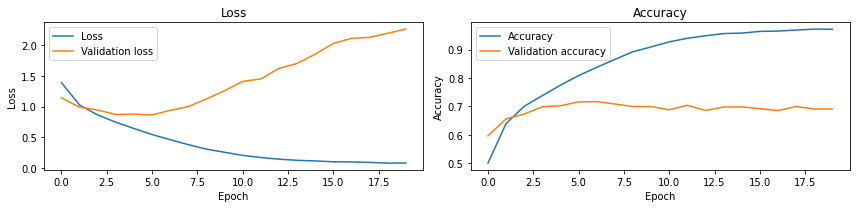

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,3))
ax[0].plot(history.history['loss'], label="Loss")
ax[0].plot(history.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy
ax[1].plot(history.history['accuracy'], label="Accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
# make prediction
# def classification_report1(x_test,y_test_cat,)
pred  = model.predict(x_test)
y_predict_classes = np.argmax(pred, axis=1)
y_test1 = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test1,y_predict_classes))


              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.76      0.86      0.80      1000
           2       0.60      0.57      0.58      1000
           3       0.49      0.50      0.50      1000
           4       0.68      0.65      0.66      1000
           5       0.57      0.60      0.59      1000
           6       0.77      0.76      0.77      1000
           7       0.74      0.72      0.73      1000
           8       0.86      0.73      0.79      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
def display_image(x_test,y_test1,y_predict_classses):
  labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  R = 5
  C = 5
  fig, axes = plt.subplots(R, C, figsize=(12,12))
  axes = axes.ravel()

  for i in np.arange(0, R*C):
      axes[i].imshow(x_test[i])
      axes[i].set_title("True: %s \nPredict: %s" % (labels[y_test1[i]], labels[y_predict_classses[i]]))
      axes[i].axis('off')
      plt.subplots_adjust(wspace=1)

# Add some dropout layers 
 Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10,activation='softmax'))  # softmax is used for classification

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
history1  = model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 125s 80ms/step - loss: 1.6224 - accuracy: 0.4017 - val_loss: 1.3039 - val_accuracy: 0.5397
Epoch 2/20
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2898 - accuracy: 0.5382 - val_loss: 1.0968 - val_accuracy: 0.6141
Epoch 3/20
1563/1563 [==============================] - 120s 77ms/step - loss: 1.1681 - accuracy: 0.5859 - val_loss: 1.0077 - val_accuracy: 0.6489
Epoch 4/20
1563/1563 [==============================] - 121s 77ms/step - loss: 1.0793 - accuracy: 0.6150 - val_loss: 0.9538 - val_accuracy: 0.6621
Epoch 5/20
1563/1563 [==============================] - 120s 77ms/step - loss: 1.0244 - accuracy: 0.6389 - val_loss: 0.9237 - val_accuracy: 0.6731
Epoch 6/20
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9841 - accuracy: 0.6545 - val_loss: 0.8796 - val_accuracy: 0.6952
Epoch 7/20
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9523 - accuracy: 0.6652 - val_loss: 0

In [ ]:
scores = model1.evaluate(x_train, y_train_cat, verbose=1)
print('Training loss:', scores[0])
print('Training accuracy:', scores[1])

1563/1563 [==============================] - 28s 18ms/step - loss: 0.5222 - accuracy: 0.8209
Training loss: 0.5222322344779968
Training accuracy: 0.8209199905395508


In [ ]:
scores = model1.evaluate(x_test, y_test_cat, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.7373 - accuracy: 0.7443
Test loss: 0.737301766872406
Test accuracy: 0.7443000078201294


In [ ]:
pred  = model1.predict(x_test)
y_predict_classes = np.argmax(pred, axis=1)
y_test1 = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test1,y_predict_classes))


              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1000
           1       0.95      0.81      0.87      1000
           2       0.75      0.53      0.62      1000
           3       0.58      0.56      0.57      1000
           4       0.66      0.73      0.70      1000
           5       0.62      0.71      0.66      1000
           6       0.76      0.86      0.81      1000
           7       0.82      0.76      0.79      1000
           8       0.79      0.88      0.83      1000
           9       0.76      0.89      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [10]:
def display_image(x_test,y_test,y_predict_class):
  labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  R = 3
  C = 5
  fig, axes = plt.subplots(R, C, figsize=(12,8))
  axes = axes.ravel()
  for i in range(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredicted: %s" %(labels[y_test[i]], labels[y_predict_class[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


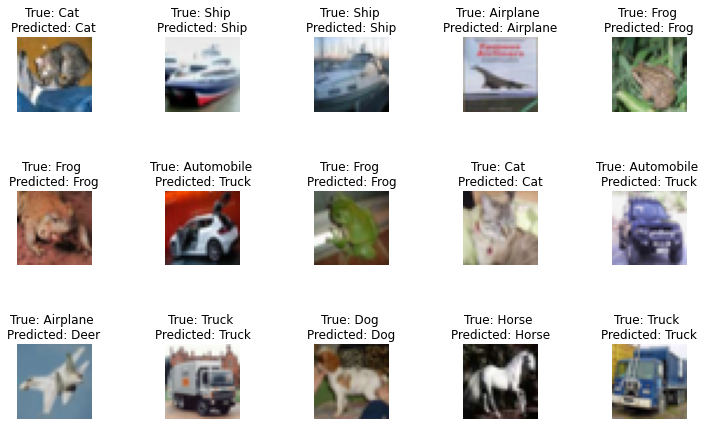

In [ ]:
display_image(x_test,y_test1,y_predict_classes)

In [11]:
# check the wrong prediction
def misclassified(x_test,y_test1,y_predict_classes):
  labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  R = 3
  C = 5
  fig, axes = plt.subplots(R, C, figsize=(12,8))
  axes = axes.ravel()

  misclassified_idx = np.where(y_predict_classes != y_test1)[0]
  for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_test1[misclassified_idx[i]]], 
                                                  labels[y_predict_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [12]:
input_shape1=x_train.shape[1:]
print(input_shape1)
x_train.shape

(32, 32, 3)


(50000, 32, 32, 3)

In [13]:
model2 = Sequential()

#convolution layer
model2.add(Conv2D(filters=50, kernel_size=(3,3),strides=(1,1), padding="same",input_shape=x_train.shape[1:], activation='relu'))

# convolution layer
model2.add(Conv2D(filters=75, kernel_size=(3,3),strides=(1,1), padding="same",activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=125, kernel_size=(3,3),strides=(1,1), padding="same",activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# flatten layer of conv
model2.add(Flatten())

# hidden layers
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(250, activation='relu'))
model2.add(Dropout(0.3))

# Output layer
model2.add(Dense(10,activation='softmax'))

In [14]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                    

In [15]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# es = EarlyStopping(monitor="val_loss",mode="min", verbose=1, patience=3)
# mc =ModelCheckpoint("best_model.h5",monitor="val_accuracy", mode="max", verbose=1, save_model_only=True)

In [17]:
model2.fit(x_train,y_train_cat,epochs=10,batch_size=128,validation_data=(x_test,y_test_cat))

Epoch 1/10
391/391 [==============================] - 584s 1s/step - loss: 0.8099 - accuracy: 0.7151 - val_loss: 0.7655 - val_accuracy: 0.7310
Epoch 2/10
391/391 [==============================] - 584s 1s/step - loss: 0.7546 - accuracy: 0.7336 - val_loss: 0.7507 - val_accuracy: 0.7359
Epoch 3/10
391/391 [==============================] - 584s 1s/step - loss: 0.7026 - accuracy: 0.7506 - val_loss: 0.7236 - val_accuracy: 0.7461
Epoch 4/10
391/391 [==============================] - 578s 1s/step - loss: 0.6617 - accuracy: 0.7662 - val_loss: 0.7186 - val_accuracy: 0.7495
Epoch 5/10
391/391 [==============================] - 580s 1s/step - loss: 0.6200 - accuracy: 0.7819 - val_loss: 0.6910 - val_accuracy: 0.7588
Epoch 6/10
391/391 [==============================] - 580s 1s/step - loss: 0.5771 - accuracy: 0.7969 - val_loss: 0.6934 - val_accuracy: 0.7593
Epoch 7/10
391/391 [==============================] - 572s 1s/step - loss: 0.5404 - accuracy: 0.8088 - val_loss: 0.6909 - val_accuracy: 0.7622

In [ ]:
# saved_model = load_model("best_model.h5")

In [18]:
_, train_acc=  model2.evaluate(x_train, y_train_cat, verbose=0)
# print('Training loss:', scores[0])
print('Training accuracy:', train_acc)

Training accuracy: 0.9416199922561646


In [19]:
_,test_acc = model2.evaluate(x_test, y_test_cat, verbose=0)
# print('Tesing loss:', scores[0])
print('Tesing accuracy:', test_acc)

Tesing accuracy: 0.7723000049591064


In [20]:
pred  = model2.predict(x_test)
y_predict_classes = np.argmax(pred, axis=1)
y_test1 = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test1,y_predict_classes))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.87      0.89      0.88      1000
           2       0.70      0.65      0.68      1000
           3       0.58      0.58      0.58      1000
           4       0.70      0.74      0.72      1000
           5       0.74      0.62      0.68      1000
           6       0.78      0.85      0.81      1000
           7       0.81      0.84      0.83      1000
           8       0.92      0.84      0.88      1000
           9       0.84      0.85      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



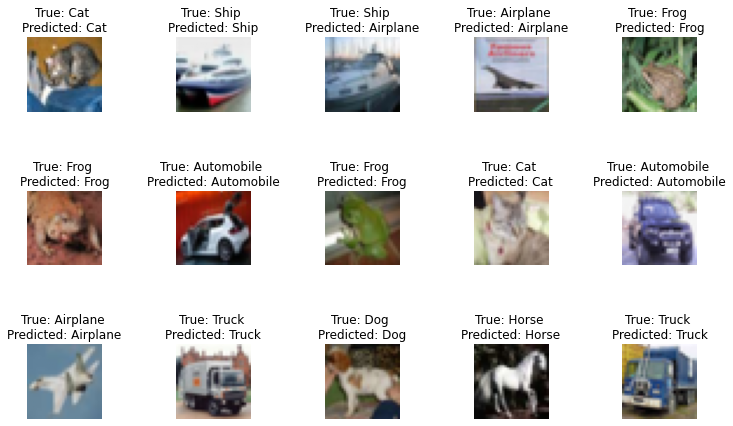

In [21]:
display_image(x_test,y_test1,y_predict_classes)

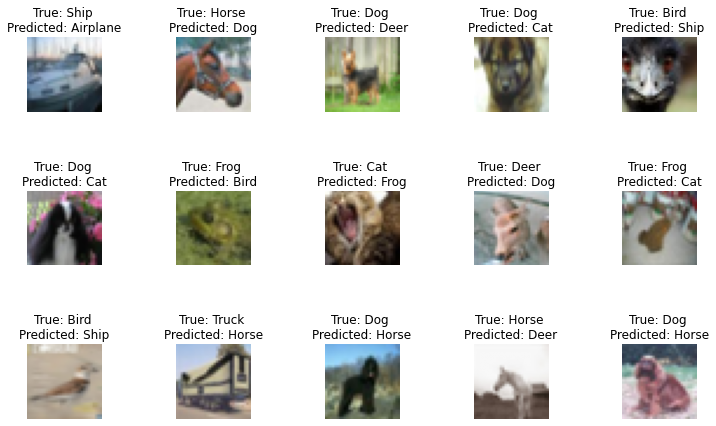

In [22]:
misclassified(x_test,y_test1,y_predict_classes)

# Save the model using pickle library 
 * pickle.dump() function is used to save the model in the file.
 * pickle.load() function is used to load the model from the file.

In [28]:
pickle.dump(model2 , open("model2.pkl",'wb'))

INFO:tensorflow:Assets written to: ram://085ea997-05bf-4e3a-8e4b-6f1213f8b11a/assets


In [29]:
load_model1 = pickle.load(open("model2.pkl",'rb'))